****
<a id='lesson-3'></a>
# Lesson-3:  Integration
****

Computing integrals (numerically) is an important task in many computational fields. In this tutorial we will explore two schemes: 
- finite difference schemes / grid schemes
- Monte Carlo scheme

Scipy has 'integrate' function: learn its usage to compuate the 'exact' value of the integral


## Grid schemes
Typically used for 1-D or 2-D integrals, by evaluating the value of the function on a regular grid and then using approximation schemes like 'trapezoidal rule'

## Task-1
Following are the sub-tasks
- Write a function that takes as input a *function* and interval, and returns the value of the integral. Assume the fuction to be one-dimensional function
- Using the above function, find the area of a unit circle



## Task-2
 Exploratory task: Adaptive grid size. When the function changes 'too fast', then next grid point is 'closer' (and change is 'too slow', then next grid point is 'farther'). Using thisi adaptive scheme compute the area of unit circle.



## Monte Carlo methods
Monte Carlo methods are typically used when we have very large dimensional integrals.

## Task-3: Compute the area of the quarter unit circle (1st quadrant)  using <span style='color:red'> simple </span> Monte Carlo method


## Task-4 
Simple Monte Carlo is almost never used; here is the 'theory' for a more proper usage...

Let us consider an integral:
$$ I = \int_a^b f(x)~dx$$
where $x\in \mathcal{R}^N$. Such multi-dimensional integrals occur in physics, chemistry, all branches of engineering, and one standard technique is to use Monte Carlo sampling. Below is a rather short presenation of connection between sampling and such integrals

### Multi-dimensional integrals using Monte Carlo sampling

$$I = \int_a^b dx~f(x) = \int_a^b dx~\rho(x) \left( \frac{f(x)}{\rho(x)}\right) =\int_a^b \rho(x)~g(x)~dx $$
with the restriction that $\rho(x)\ne0\forall x\in[a,b]$, and $g(x)={f(x)}/{\rho(x)}$.  

When the fuction $\rho(x)$ statisfies the following conditions:
1. $\rho(x) \ge 0~\forall~x\in[a,b]$
2. $\int_a^b dx~\rho(x) = 1$

such a function can be considered a probability density function. 

When $\rho(x)$ is a probability density function, 
$$ I = \int_a^b \rho(x)~g(x)~dx = \mathbb{E}_{x\sim\rho}~g(x)= \text{average value of } g(x) \text{ with } x \text{ sampled with probability density }\rho(x)$$
The power of the Monte Carlo method comes from the flexibility in the choice of $\rho(x)$. If $\rho(x)$ is so chosen that it is also large when $|f(x)|$ is large and $\rho(x)$ is small when $|f(x)|$ is small, the efficiency of computing the integral is great. In a proper statistics course, this is demostrated by showing that the variance of computation decreases; this will not be attempted here. The 'Monte Carlo' in the name comes from the fact that random sampling of $x$ with probability density $\rho(x)$; gambling in casinos rely heavily on random numbers.

### Task 4.1: Compute area of circle with $\rho(x)=\text{constant}$



### Task 4.2: Compute the are of the circle with $\rho(x)$ being the Gaussian distribution (i.e. normal distribution)



## Task-5 One simple measure of efficiency of computation

What is possible is to check that the efficiency of computation: how 'fast' is the computation? Smaller is the number of function evaluations used, greater is the efficiency. Alternatively, for the same number of function evaluations, lower error would mean greater efficiency.

Compute the graph of $N$ vs $error(N)$ where $N$ is the number of function computations, under various schemes listed below:
1. Naive Monte Carlo
2. Importance Sampling with uniform  distrituion
3. Importance Sampling with Gaussian districutuion



In [2]:
import numpy as np
from scipy.integrate import quad
from sympy import sympify, lambdify, sqrt
from sympy.abc import x
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x) 

quad(f, 0, np.pi)

(2.0, 2.220446049250313e-14)

### Solution to Task 1.1
We basically use the sympify and lambdify functions of the sympy library to take input of a 1D function,
and also the lower and upper limits. We pass all of these to the quad function from the scipy libary to 
evaluate the integral numerically. We do not need the error which it outputs so we only return the integral
value.

In [3]:

def integrate_function(f, a, b, n =10000):
    expr = sympify(f)  
    f_numeric = lambdify(x, expr)  
    
    slope = (f_numeric(b) - f_numeric(a)) / (b - a)
    
    t = np.linspace(a, b, n)
    i = 0
    j = 1
    integral_value = 0
    f_val = [f_numeric(j) for j in t]
    
    while j in range(n-1):
        if ((f_val[j] - f_val[i]) / (t[j] - t[i]) > slope and
        j != n and
        not ((f_val[j + 1] - f_val[j]) == 0) and
        not ((f_val[j + 1] - f_val[j]) / (f_val[j] - f_val[j - 1]))):
            j += 1
        else:
            integral_value += (0.5 * (f_val[j] + f_val[i]) * (t[j] - t[i]))
            i += 1
            j += 1

    return integral_value

function_string = input("Enter the function to integrate (in terms of x): ")
lower_limit = float(input("Enter the lower limit of the interval: "))
upper_limit = float(input("Enter the upper limit of the interval: "))

integral = integrate_function(function_string, lower_limit, upper_limit)
print("Numerical value of the integral:", integral)


Numerical value of the integral: 38.992499745010406


## Solution to Task 1.2
We pass the required limits to calculate the integral of the circle.

In [4]:
function_string = (1-x**2)**(0.5)
lower_limit = -1
upper_limit = 1

integral = 2*integrate_function(function_string, lower_limit, upper_limit)
print("Numerical value of the integral:", integral)

Numerical value of the integral: 3.141585326531584


## Solution to Task 2
Here we have to implement adaptive grid sizes method for integration. We divide the interval into many points and use trapezoidal integration at each point with the additional constraint that if the slope between the function calculated at these points is higher than the slope over the whole function we iteratively consider larger intervals. This is possible because of the mean value theorem.

In [5]:
def adaptive_integral(f, a, b, n=10000):
    expr = sympify(f)  
    f_numeric = lambdify(x, expr)
    
    slope = (f_numeric(b) - f_numeric(a)) / (b - a)
    
    t = np.linspace(a, b, n)
    i = 0
    j = 1
    sum = 0
    f_val = [f_numeric(j) for j in t]
    
    while j in range(n-1):
        if ((f_val[j] - f_val[i]) / (t[j] - t[i]) > slope and
        j != n and
        not ((f_val[j + 1] - f_val[j]) == 0) and
        not ((f_val[j + 1] - f_val[j]) / (f_val[j] - f_val[j - 1]))):
            j += 1
        else:
            sum += (0.5 * (f_val[j] + f_val[i]) * (t[j] - t[i]))
            i += 1
            j += 1
    print(sum)
    
function_string = input("Enter the function to integrate (in terms of x): ")
lower_limit = float(input("Enter the lower limit of the interval: "))
upper_limit = float(input("Enter the upper limit of the interval: "))

integral = adaptive_integral(function_string, lower_limit, upper_limit, 1000) 

38.92497451053304


In [6]:
def adaptive_integral(f, a, b, n=10000):
    expr = sympify(f)  
    f_numeric = lambdify(x, expr)
    
    slope = (f_numeric(b) - f_numeric(a)) / (b - a)
    
    t = np.linspace(a, b, n)
    i = 0
    j = 1
    sum = 0
    f_val = [f_numeric(j) for j in t]
    
    while j in range(n-1):
        if ((f_val[j] - f_val[i]) / (t[j] - t[i]) > slope and
        j != n and
        not ((f_val[j + 1] - f_val[j]) == 0) and
        not ((f_val[j + 1] - f_val[j]) / (f_val[j] - f_val[j - 1]))):
            j += 1
        else:
            sum += (0.5 * (f_val[j] + f_val[i]) * (t[j] - t[i]))
            i += 1
            j += 1
    return sum
    
function_string = "(1-x**2)**(0.5)"
lower_limit = -1
upper_limit = 1

integral = 2*adaptive_integral(function_string, lower_limit, upper_limit, 1000) 

print(f"The area of the circle is {integral}")

The area of the circle is 3.1413607013855898


## Solution to Task 3
We will use SIMPLE Monte Carlo Methods by finding the probability that
a randomly selected point in the unit square in the first quadrant is also
inside the unit circle.

For a relatively large number of points this ratio gives us the ratio of the areas of these two figures.

$\lim_{n \to +\infty} \frac{Number of Points in Circle}{Number of Points in Square} = \frac{[Circle]}{[Square]}$

where $[Circle]$ Denotes the area of the Circle
    	    
Since the Riemann integral is the area under the sum this gives us another 
method to calculate the integral.


In [7]:
import random

def find_area(num_points):
    points_inside_circle = 0
    points_inside_square = 0

    for _ in range(num_points):
        x = random.random()  
        y = random.random()  

        if x**2 + y**2 <= 1:  
            points_inside_circle += 1

        points_inside_square += 1

    ratio = points_inside_circle / points_inside_square
    estimated_area = ratio   
    
    return estimated_area

num_points = 10
estimated_area = find_area(num_points)
print(f"Estimated area of the first quadrant of the unit circle: {estimated_area}")

Estimated area of the first quadrant of the unit circle: 1.0


## Solution to Task 4.1
Here we are using the random.uniform function to generate random numbers on the positive x axis. We average the value of the circle function in the positive half plane over these points with the given probability distribution and in the limit that we use a relatively large number of points we obtain a good approximation for the circles area by multiplying this by 4. 

In [8]:
import math

def circle_area_uniform(radius, num_points):
    sum = 0
    for _ in range(num_points):
        x = random.uniform(0, radius)
        if(x < radius):
            f_x= (radius**2 - x ** 2)**(0.5)
        else:
            f_x=0
        sum+=f_x
    
    return (sum / num_points)*radius


radius = 1.0  
num_points = 10
estimated_area = circle_area_uniform(radius, num_points)
estimated_area *= 4

print(f"Estimated area of the circle: {estimated_area}")


Estimated area of the circle: 3.361759083681587


## Solution to Task 4.2
Here we will utilize a gaussian distribution as the probability distribution for our monte carlo due to which more points will be generated which belong to a certain region thus effectively weighting that region more. This leads to a more accurate estimation of the area of our figure with the same number of points.

In [9]:
import random
import math
import numpy as np

def gaussian(x, mean, sigma):
    ans = np.exp(-(x - mean)**2 / (2 * (sigma**2))) / (sigma * np.sqrt(2 * np.pi))
    return ans

def circle_area_gaussian(radius, num_points):
    total_area = 0.0
    
    for _ in range(num_points):
        x = random.gauss(0, 1)  
        if(x**2 <= radius**2):
            f_x = (radius**2 - x**2)**0.5 / gaussian(x, 0, radius) 
        else:
            f_x=0
            
        total_area += f_x
    
    return (total_area / num_points)

radius = 1.0
num_points = 1000
estimated_area = 2 * circle_area_gaussian(radius, num_points)

print(f"Estimated area of the circle: {estimated_area}")



Estimated area of the circle: 3.194920797566101


## Solution to Task 5
Here we will compute the values through the 3 methods previously shown in the worksheet for different values of N and compare the error we have. 

In [10]:
def iterativeNaiveDriver(area, num_points):
    total_points=(area/4)*num_points
    x = random.random()  
    y = random.random()  

    if x**2 + y**2 <= 1:  
        total_points += 1

    estimated_area=total_points/(num_points+1)
    return estimated_area*4

def iterativeNaive(num_iters):
    areas=[]
    areas.append(0)
    for i in range(1,num_iters):
        areas.append(iterativeNaiveDriver(areas[i-1], i))
    return areas

def iterativeGaussianDriver(radius, area, num_points):
    
    x = random.gauss(0, 1)  
    if(x**2 <= radius**2):
            f_x = (radius**2 - x**2)**0.5 / gaussian(x, 0, radius)
    else:
            f_x=0
            
    total_area = 2*f_x+(area*num_points)
    
    return (total_area/(num_points+1))

def iterativeGaussian(num_iters):
    areas=[]
    areas.append(0)
    for i in range(1,num_iters):
        areas.append(iterativeGaussianDriver(1, areas[i-1], i))
    return areas

def iterativeUniformDriver(radius, area, num_points):
    
    x = random.random()  
    if(x**2 <= radius**2):
            f_x = (radius**2 - x**2)**0.5 
    else:
            f_x=0
            
    total_area = 4*f_x+(area*num_points)
    
    return (total_area/(num_points+1))

def iterativeUniform(num_iters):
    areas=[]
    areas.append(0)
    for i in range(1,num_iters):
        areas.append(iterativeUniformDriver(1, areas[i-1], i))
    return areas



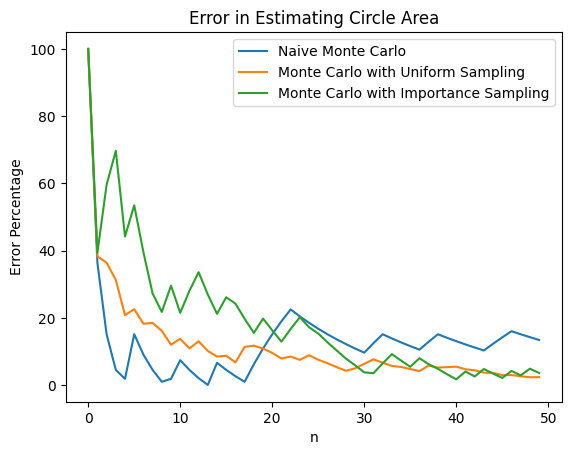

In [27]:
n=[i for i in range(50)]

naive=iterativeNaive(50)
Uniform=iterativeUniform(50)
Gauss=iterativeGaussian(50)


def calculate_error_percentage(areas):
    pi = math.pi
    errors = []
    
    for area in areas:
        error = abs(area - pi) / pi * 100
        errors.append(error)
    
    return errors


naive_errors = calculate_error_percentage(naive)
uniform_errors = calculate_error_percentage(Uniform)
gaussian_errors = calculate_error_percentage(Gauss)

plt.plot(n, naive_errors, label='Naive Monte Carlo')
plt.plot(n, uniform_errors, label='Monte Carlo with Uniform Sampling')
plt.plot(n, gaussian_errors, label='Monte Carlo with Importance Sampling')
plt.xlabel('n')
plt.ylabel('Error Percentage')
plt.title('Error in Estimating Circle Area')
plt.legend()
plt.show()


Hence, we can see that naive monte carlo methods have a higher percentage error for the same number of iterations and hence they are not preferred in practical situations. For this smaller sample size, our monte carlo with importance sampling barely outperforms our gaussian sampled monte carlo however for larger values our importance sampling will outperform our uniform sampling monte carlo.